In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the directory path
data_dir = r"D:\archive (1)\PlantVillage"

# Load the entire dataset
full_dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Define the sizes of each split
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

# Split the dataset into training, validation, and testing sets
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])

# Create data loaders for each set
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

# Print class names
print(full_dataset.classes)

# Custom MobileNet-like model definition for 64x64 images
class CustomMobileNet(nn.Module):
    def __init__(self, num_classes=15, in_channels=3, dropout_rate=0.2):
        super(CustomMobileNet, self).__init__()

        # Stem convolutional layer
        self.stem = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)
        )

        # Blocks (similar to MobileNet's design)
        self.blocks = nn.Sequential(
            MobileBlock(32, 64, 1, 1, dropout_rate),
            MobileBlock(64, 128, 2, 2, dropout_rate),
            MobileBlock(128, 256, 2, 2, dropout_rate),
            MobileBlock(256, 512, 6, 2, dropout_rate),
            MobileBlock(512, 1024, 3, 1, dropout_rate),
            MobileBlock(1024, 2048, 1, 1, dropout_rate)
        )

        # Classifier head
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(dropout_rate),
            nn.Linear(2048, num_classes)
        )

    def forward(self, x):
        x = self.stem(x)
        x = self.blocks(x)
        x = self.classifier(x)
        return x


class MobileBlock(nn.Module):
    def __init__(self, in_channels, out_channels, num_layers, stride, dropout_rate):
        super(MobileBlock, self).__init__()

        layers = []
        for _ in range(num_layers):
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, groups=in_channels))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU(inplace=True))
            layers.append(nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, padding=0))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU(inplace=True))
            in_channels = out_channels
        
        layers.append(nn.Dropout(dropout_rate))
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)


# Print the model architecture
model = CustomMobileNet(num_classes=15).to(device)
print(model)



['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
CustomMobileNet(
  (stem): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (blocks): Sequential(
    (0): MobileBlock(
      (block): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
       


Training with learning rate: 0.001


Epoch [1/50], Train Loss: 2.4032, Train Accuracy: 0.2289, Val Loss: 3.7891, Val Accuracy: 0.0877


Epoch [2/50], Train Loss: 1.9147, Train Accuracy: 0.3831, Val Loss: 3.1162, Val Accuracy: 0.1929


Epoch [3/50], Train Loss: 1.5790, Train Accuracy: 0.4883, Val Loss: 2.7513, Val Accuracy: 0.3020


Epoch [4/50], Train Loss: 1.2961, Train Accuracy: 0.5750, Val Loss: 2.2451, Val Accuracy: 0.4023


Epoch [5/50], Train Loss: 1.1067, Train Accuracy: 0.6396, Val Loss: 2.0817, Val Accuracy: 0.4619


Epoch [6/50], Train Loss: 0.9393, Train Accuracy: 0.6924, Val Loss: 1.9920, Val Accuracy: 0.4809


Epoch [7/50], Train Loss: 0.8118, Train Accuracy: 0.7345, Val Loss: 2.0684, Val Accuracy: 0.4862


Epoch [8/50], Train Loss: 0.7156, Train Accuracy: 0.7669, Val Loss: 1.8684, Val Accuracy: 0.5230


Epoch [9/50], Train Loss: 0.6305, Train Accuracy: 0.7927, Val Loss: 1.3693, Val Accuracy: 0.6248


Epoch [10/50], Train Loss: 0.5622, Train Accuracy: 0.8164, Val Loss: 1.1713, Val Accuracy: 0.6762


Epoch [11/50], Train Loss: 0.4930, Train Accuracy: 0.8394, Val Loss: 1.0822, Val Accuracy: 0.6951


Epoch [12/50], Train Loss: 0.4580, Train Accuracy: 0.8532, Val Loss: 1.0191, Val Accuracy: 0.7004


Epoch [13/50], Train Loss: 0.3966, Train Accuracy: 0.8728, Val Loss: 0.8709, Val Accuracy: 0.7547


Epoch [14/50], Train Loss: 0.3588, Train Accuracy: 0.8906, Val Loss: 0.7936, Val Accuracy: 0.7765


Epoch [15/50], Train Loss: 0.3338, Train Accuracy: 0.8960, Val Loss: 0.7459, Val Accuracy: 0.7891


Epoch [16/50], Train Loss: 0.2965, Train Accuracy: 0.9087, Val Loss: 0.7738, Val Accuracy: 0.7848


Epoch [17/50], Train Loss: 0.2680, Train Accuracy: 0.9165, Val Loss: 0.7478, Val Accuracy: 0.7770


Epoch [18/50], Train Loss: 0.2472, Train Accuracy: 0.9262, Val Loss: 0.5361, Val Accuracy: 0.8449


Epoch [19/50], Train Loss: 0.2274, Train Accuracy: 0.9297, Val Loss: 0.5527, Val Accuracy: 0.8347


Epoch [20/50], Train Loss: 0.2269, Train Accuracy: 0.9303, Val Loss: 0.5483, Val Accuracy: 0.8439


Epoch [21/50], Train Loss: 0.1978, Train Accuracy: 0.9390, Val Loss: 0.7559, Val Accuracy: 0.8003


Epoch [22/50], Train Loss: 0.2023, Train Accuracy: 0.9404, Val Loss: 0.4510, Val Accuracy: 0.8643


Epoch [23/50], Train Loss: 0.1861, Train Accuracy: 0.9449, Val Loss: 0.4239, Val Accuracy: 0.8735


Epoch [24/50], Train Loss: 0.1674, Train Accuracy: 0.9492, Val Loss: 0.5720, Val Accuracy: 0.8522


Epoch [25/50], Train Loss: 0.1579, Train Accuracy: 0.9531, Val Loss: 0.4665, Val Accuracy: 0.8706


Epoch [26/50], Train Loss: 0.1567, Train Accuracy: 0.9538, Val Loss: 0.5356, Val Accuracy: 0.8483


Epoch [27/50], Train Loss: 0.1378, Train Accuracy: 0.9600, Val Loss: 0.7111, Val Accuracy: 0.8216


Epoch [28/50], Train Loss: 0.1451, Train Accuracy: 0.9570, Val Loss: 0.4195, Val Accuracy: 0.8769


Epoch [29/50], Train Loss: 0.1300, Train Accuracy: 0.9620, Val Loss: 0.4442, Val Accuracy: 0.8812


Epoch [30/50], Train Loss: 0.1211, Train Accuracy: 0.9647, Val Loss: 0.3144, Val Accuracy: 0.9084


Epoch [31/50], Train Loss: 0.1269, Train Accuracy: 0.9637, Val Loss: 0.3442, Val Accuracy: 0.8992


Epoch [32/50], Train Loss: 0.1319, Train Accuracy: 0.9614, Val Loss: 0.6027, Val Accuracy: 0.8303


Epoch [33/50], Train Loss: 0.1132, Train Accuracy: 0.9669, Val Loss: 0.3512, Val Accuracy: 0.9055


Epoch [34/50], Train Loss: 0.1227, Train Accuracy: 0.9647, Val Loss: 0.3877, Val Accuracy: 0.8914


Epoch [35/50], Train Loss: 0.1094, Train Accuracy: 0.9675, Val Loss: 0.2937, Val Accuracy: 0.9220


Epoch [36/50], Train Loss: 0.1100, Train Accuracy: 0.9688, Val Loss: 0.2745, Val Accuracy: 0.9273


Epoch [37/50], Train Loss: 0.0858, Train Accuracy: 0.9753, Val Loss: 0.2961, Val Accuracy: 0.9210


Epoch [38/50], Train Loss: 0.0924, Train Accuracy: 0.9734, Val Loss: 0.3388, Val Accuracy: 0.9137


Epoch [39/50], Train Loss: 0.1009, Train Accuracy: 0.9729, Val Loss: 0.3701, Val Accuracy: 0.9011


Epoch [40/50], Train Loss: 0.1045, Train Accuracy: 0.9714, Val Loss: 0.4120, Val Accuracy: 0.8812


Epoch [41/50], Train Loss: 0.0877, Train Accuracy: 0.9758, Val Loss: 0.2274, Val Accuracy: 0.9370


Epoch [42/50], Train Loss: 0.0892, Train Accuracy: 0.9740, Val Loss: 0.4090, Val Accuracy: 0.8851


Epoch [43/50], Train Loss: 0.0850, Train Accuracy: 0.9754, Val Loss: 0.3119, Val Accuracy: 0.9157


Epoch [44/50], Train Loss: 0.0833, Train Accuracy: 0.9774, Val Loss: 0.2968, Val Accuracy: 0.9215


Epoch [45/50], Train Loss: 0.0813, Train Accuracy: 0.9781, Val Loss: 0.3198, Val Accuracy: 0.9258


Epoch [46/50], Train Loss: 0.0848, Train Accuracy: 0.9764, Val Loss: 0.3486, Val Accuracy: 0.9098


Epoch [47/50], Train Loss: 0.0879, Train Accuracy: 0.9756, Val Loss: 0.3206, Val Accuracy: 0.9132


Epoch [48/50], Train Loss: 0.0796, Train Accuracy: 0.9780, Val Loss: 0.3584, Val Accuracy: 0.9074


Epoch [49/50], Train Loss: 0.0809, Train Accuracy: 0.9786, Val Loss: 0.2491, Val Accuracy: 0.9355


Epoch [50/50], Train Loss: 0.0736, Train Accuracy: 0.9804, Val Loss: 0.1941, Val Accuracy: 0.9520
Test Loss: 0.1551, Test Accuracy: 0.9613

Training with learning rate: 0.0001


Epoch [1/50], Train Loss: 2.5812, Train Accuracy: 0.1476, Val Loss: 2.8757, Val Accuracy: 0.1076


Epoch [2/50], Train Loss: 2.5178, Train Accuracy: 0.1669, Val Loss: 3.0545, Val Accuracy: 0.1071


Epoch [3/50], Train Loss: 2.4877, Train Accuracy: 0.1738, Val Loss: 3.1305, Val Accuracy: 0.0950


Epoch [4/50], Train Loss: 2.4335, Train Accuracy: 0.1901, Val Loss: 3.2832, Val Accuracy: 0.0863


Epoch [5/50], Train Loss: 2.4074, Train Accuracy: 0.1957, Val Loss: 3.4964, Val Accuracy: 0.0553


Epoch [6/50], Train Loss: 2.3790, Train Accuracy: 0.2057, Val Loss: 3.3614, Val Accuracy: 0.0829


Epoch [7/50], Train Loss: 2.3439, Train Accuracy: 0.2169, Val Loss: 3.4190, Val Accuracy: 0.0679


Epoch [8/50], Train Loss: 2.3002, Train Accuracy: 0.2324, Val Loss: 3.6258, Val Accuracy: 0.0485


Epoch [9/50], Train Loss: 2.2724, Train Accuracy: 0.2417, Val Loss: 3.7375, Val Accuracy: 0.0533


Epoch [10/50], Train Loss: 2.2226, Train Accuracy: 0.2575, Val Loss: 3.9793, Val Accuracy: 0.0499


Epoch [11/50], Train Loss: 2.1934, Train Accuracy: 0.2709, Val Loss: 3.9725, Val Accuracy: 0.0490


Epoch [12/50], Train Loss: 2.1508, Train Accuracy: 0.2854, Val Loss: 3.9873, Val Accuracy: 0.0524


Epoch [13/50], Train Loss: 2.1063, Train Accuracy: 0.3011, Val Loss: 3.8261, Val Accuracy: 0.0601


Epoch [14/50], Train Loss: 2.0598, Train Accuracy: 0.3154, Val Loss: 3.9546, Val Accuracy: 0.0708


Epoch [15/50], Train Loss: 2.0298, Train Accuracy: 0.3294, Val Loss: 4.0123, Val Accuracy: 0.0756


Epoch [16/50], Train Loss: 2.0005, Train Accuracy: 0.3352, Val Loss: 3.8773, Val Accuracy: 0.0819


Epoch [17/50], Train Loss: 1.9574, Train Accuracy: 0.3525, Val Loss: 3.9372, Val Accuracy: 0.0873


Epoch [18/50], Train Loss: 1.9345, Train Accuracy: 0.3589, Val Loss: 3.7806, Val Accuracy: 0.0984


Epoch [19/50], Train Loss: 1.8970, Train Accuracy: 0.3679, Val Loss: 3.7263, Val Accuracy: 0.0931


Epoch [20/50], Train Loss: 1.8553, Train Accuracy: 0.3849, Val Loss: 3.8019, Val Accuracy: 0.1095


Epoch [21/50], Train Loss: 1.8093, Train Accuracy: 0.3985, Val Loss: 3.5140, Val Accuracy: 0.1202


Epoch [22/50], Train Loss: 1.7678, Train Accuracy: 0.4144, Val Loss: 3.5969, Val Accuracy: 0.1265


Epoch [23/50], Train Loss: 1.7361, Train Accuracy: 0.4254, Val Loss: 3.2563, Val Accuracy: 0.1672


Epoch [24/50], Train Loss: 1.6798, Train Accuracy: 0.4420, Val Loss: 3.2856, Val Accuracy: 0.1706


Epoch [25/50], Train Loss: 1.6057, Train Accuracy: 0.4658, Val Loss: 3.1625, Val Accuracy: 0.1890


Epoch [26/50], Train Loss: 1.5427, Train Accuracy: 0.4820, Val Loss: 3.0646, Val Accuracy: 0.1910


Epoch [27/50], Train Loss: 1.4595, Train Accuracy: 0.5154, Val Loss: 3.0276, Val Accuracy: 0.2278


Epoch [28/50], Train Loss: 1.3857, Train Accuracy: 0.5356, Val Loss: 3.0883, Val Accuracy: 0.2031


Epoch [29/50], Train Loss: 1.3307, Train Accuracy: 0.5539, Val Loss: 3.1025, Val Accuracy: 0.2089


Epoch [30/50], Train Loss: 1.2675, Train Accuracy: 0.5736, Val Loss: 2.7568, Val Accuracy: 0.2535


Epoch [31/50], Train Loss: 1.2231, Train Accuracy: 0.5870, Val Loss: 2.7553, Val Accuracy: 0.2414


Epoch [32/50], Train Loss: 1.1766, Train Accuracy: 0.5996, Val Loss: 2.6455, Val Accuracy: 0.2986


Epoch [33/50], Train Loss: 1.1187, Train Accuracy: 0.6201, Val Loss: 2.4453, Val Accuracy: 0.3097


Epoch [34/50], Train Loss: 1.0915, Train Accuracy: 0.6313, Val Loss: 2.5484, Val Accuracy: 0.3073


Epoch [35/50], Train Loss: 1.0481, Train Accuracy: 0.6414, Val Loss: 2.4074, Val Accuracy: 0.3354


Epoch [36/50], Train Loss: 1.0066, Train Accuracy: 0.6600, Val Loss: 2.3385, Val Accuracy: 0.3563


Epoch [37/50], Train Loss: 0.9787, Train Accuracy: 0.6643, Val Loss: 2.2918, Val Accuracy: 0.3446


Epoch [38/50], Train Loss: 0.9330, Train Accuracy: 0.6823, Val Loss: 2.3394, Val Accuracy: 0.3485


Epoch [39/50], Train Loss: 0.8919, Train Accuracy: 0.6958, Val Loss: 2.1909, Val Accuracy: 0.3834


Epoch [40/50], Train Loss: 0.8654, Train Accuracy: 0.7054, Val Loss: 2.2080, Val Accuracy: 0.3732


Epoch [41/50], Train Loss: 0.8324, Train Accuracy: 0.7199, Val Loss: 2.2785, Val Accuracy: 0.3742


Epoch [42/50], Train Loss: 0.8025, Train Accuracy: 0.7250, Val Loss: 2.0533, Val Accuracy: 0.4086


Epoch [43/50], Train Loss: 0.7577, Train Accuracy: 0.7424, Val Loss: 2.0198, Val Accuracy: 0.4062


Epoch [44/50], Train Loss: 0.7418, Train Accuracy: 0.7463, Val Loss: 2.1655, Val Accuracy: 0.4033


Epoch [45/50], Train Loss: 0.7061, Train Accuracy: 0.7583, Val Loss: 2.1196, Val Accuracy: 0.4203


Epoch [46/50], Train Loss: 0.6800, Train Accuracy: 0.7690, Val Loss: 1.8890, Val Accuracy: 0.4639


Epoch [47/50], Train Loss: 0.6542, Train Accuracy: 0.7755, Val Loss: 1.9794, Val Accuracy: 0.4421


Epoch [48/50], Train Loss: 0.6232, Train Accuracy: 0.7898, Val Loss: 1.9896, Val Accuracy: 0.4523


Epoch [49/50], Train Loss: 0.6077, Train Accuracy: 0.7905, Val Loss: 1.8897, Val Accuracy: 0.4726


Epoch [50/50], Train Loss: 0.5722, Train Accuracy: 0.8040, Val Loss: 1.8444, Val Accuracy: 0.4949
Test Loss: 1.8494, Test Accuracy: 0.4697

Training with learning rate: 1e-05


Epoch [1/50], Train Loss: 2.6784, Train Accuracy: 0.1091, Val Loss: 2.6305, Val Accuracy: 0.1197


Epoch [2/50], Train Loss: 2.5947, Train Accuracy: 0.1421, Val Loss: 2.6725, Val Accuracy: 0.1115


Epoch [3/50], Train Loss: 2.5632, Train Accuracy: 0.1511, Val Loss: 2.7110, Val Accuracy: 0.1086


Epoch [4/50], Train Loss: 2.5498, Train Accuracy: 0.1523, Val Loss: 2.7373, Val Accuracy: 0.1086


Epoch [5/50], Train Loss: 2.5454, Train Accuracy: 0.1564, Val Loss: 2.7407, Val Accuracy: 0.1081


Epoch [6/50], Train Loss: 2.5338, Train Accuracy: 0.1570, Val Loss: 2.7694, Val Accuracy: 0.1081


Epoch [7/50], Train Loss: 2.5256, Train Accuracy: 0.1610, Val Loss: 2.7922, Val Accuracy: 0.1095


Epoch [8/50], Train Loss: 2.5217, Train Accuracy: 0.1649, Val Loss: 2.8068, Val Accuracy: 0.1066


Epoch [9/50], Train Loss: 2.5167, Train Accuracy: 0.1639, Val Loss: 2.8413, Val Accuracy: 0.1066


Epoch [10/50], Train Loss: 2.5093, Train Accuracy: 0.1653, Val Loss: 2.8521, Val Accuracy: 0.1081


Epoch [11/50], Train Loss: 2.5060, Train Accuracy: 0.1663, Val Loss: 2.8665, Val Accuracy: 0.1071


Epoch [12/50], Train Loss: 2.5008, Train Accuracy: 0.1660, Val Loss: 2.8953, Val Accuracy: 0.1076


Epoch [13/50], Train Loss: 2.4947, Train Accuracy: 0.1651, Val Loss: 2.8899, Val Accuracy: 0.1081


Epoch [14/50], Train Loss: 2.4938, Train Accuracy: 0.1738, Val Loss: 2.9233, Val Accuracy: 0.1071


Epoch [15/50], Train Loss: 2.4787, Train Accuracy: 0.1749, Val Loss: 2.9320, Val Accuracy: 0.1081


Epoch [16/50], Train Loss: 2.4748, Train Accuracy: 0.1747, Val Loss: 2.9805, Val Accuracy: 0.1071


Epoch [17/50], Train Loss: 2.4704, Train Accuracy: 0.1780, Val Loss: 2.9809, Val Accuracy: 0.1076


Epoch [18/50], Train Loss: 2.4735, Train Accuracy: 0.1754, Val Loss: 3.0001, Val Accuracy: 0.1081


Epoch [19/50], Train Loss: 2.4713, Train Accuracy: 0.1748, Val Loss: 3.0137, Val Accuracy: 0.1081


Epoch [20/50], Train Loss: 2.4653, Train Accuracy: 0.1775, Val Loss: 3.0204, Val Accuracy: 0.1076


Epoch [21/50], Train Loss: 2.4620, Train Accuracy: 0.1764, Val Loss: 3.0612, Val Accuracy: 0.1071


Epoch [22/50], Train Loss: 2.4562, Train Accuracy: 0.1816, Val Loss: 3.0646, Val Accuracy: 0.1076


Epoch [23/50], Train Loss: 2.4520, Train Accuracy: 0.1809, Val Loss: 3.1071, Val Accuracy: 0.1081


Epoch [24/50], Train Loss: 2.4488, Train Accuracy: 0.1808, Val Loss: 3.1005, Val Accuracy: 0.1071


Epoch [25/50], Train Loss: 2.4407, Train Accuracy: 0.1855, Val Loss: 3.1295, Val Accuracy: 0.1071


Epoch [26/50], Train Loss: 2.4374, Train Accuracy: 0.1912, Val Loss: 3.1675, Val Accuracy: 0.1071


Epoch [27/50], Train Loss: 2.4444, Train Accuracy: 0.1824, Val Loss: 3.1552, Val Accuracy: 0.1071


Epoch [28/50], Train Loss: 2.4305, Train Accuracy: 0.1866, Val Loss: 3.1828, Val Accuracy: 0.1066


Epoch [29/50], Train Loss: 2.4234, Train Accuracy: 0.1895, Val Loss: 3.2229, Val Accuracy: 0.1071


Epoch [30/50], Train Loss: 2.4196, Train Accuracy: 0.1966, Val Loss: 3.2487, Val Accuracy: 0.1086


Epoch [31/50], Train Loss: 2.4196, Train Accuracy: 0.1916, Val Loss: 3.2553, Val Accuracy: 0.1047


Epoch [32/50], Train Loss: 2.4245, Train Accuracy: 0.1928, Val Loss: 3.2892, Val Accuracy: 0.1032


Epoch [33/50], Train Loss: 2.4146, Train Accuracy: 0.1930, Val Loss: 3.3026, Val Accuracy: 0.0974


Epoch [34/50], Train Loss: 2.4075, Train Accuracy: 0.1935, Val Loss: 3.4177, Val Accuracy: 0.0897


Epoch [35/50], Train Loss: 2.4086, Train Accuracy: 0.1972, Val Loss: 3.3976, Val Accuracy: 0.0911


Epoch [36/50], Train Loss: 2.4027, Train Accuracy: 0.2006, Val Loss: 3.3817, Val Accuracy: 0.0916


Epoch [37/50], Train Loss: 2.3980, Train Accuracy: 0.1969, Val Loss: 3.4048, Val Accuracy: 0.0713


Epoch [38/50], Train Loss: 2.3905, Train Accuracy: 0.1961, Val Loss: 3.4783, Val Accuracy: 0.0645


Epoch [39/50], Train Loss: 2.3930, Train Accuracy: 0.1992, Val Loss: 3.4393, Val Accuracy: 0.0756


Epoch [40/50], Train Loss: 2.3949, Train Accuracy: 0.1979, Val Loss: 3.4800, Val Accuracy: 0.0582


Epoch [41/50], Train Loss: 2.3897, Train Accuracy: 0.2007, Val Loss: 3.5067, Val Accuracy: 0.0640


Epoch [42/50], Train Loss: 2.3777, Train Accuracy: 0.2044, Val Loss: 3.4837, Val Accuracy: 0.0650


Epoch [43/50], Train Loss: 2.3818, Train Accuracy: 0.2036, Val Loss: 3.4788, Val Accuracy: 0.0596


Epoch [44/50], Train Loss: 2.3697, Train Accuracy: 0.2043, Val Loss: 3.5801, Val Accuracy: 0.0606


Epoch [45/50], Train Loss: 2.3694, Train Accuracy: 0.2047, Val Loss: 3.4934, Val Accuracy: 0.0538


Epoch [46/50], Train Loss: 2.3609, Train Accuracy: 0.2050, Val Loss: 3.5875, Val Accuracy: 0.0538


Epoch [47/50], Train Loss: 2.3649, Train Accuracy: 0.2092, Val Loss: 3.5598, Val Accuracy: 0.0553


Epoch [48/50], Train Loss: 2.3630, Train Accuracy: 0.2102, Val Loss: 3.5889, Val Accuracy: 0.0509


Epoch [49/50], Train Loss: 2.3595, Train Accuracy: 0.2092, Val Loss: 3.5790, Val Accuracy: 0.0504


Epoch [50/50], Train Loss: 2.3583, Train Accuracy: 0.2075, Val Loss: 3.6082, Val Accuracy: 0.0509
Test Loss: 3.5149, Test Accuracy: 0.0484


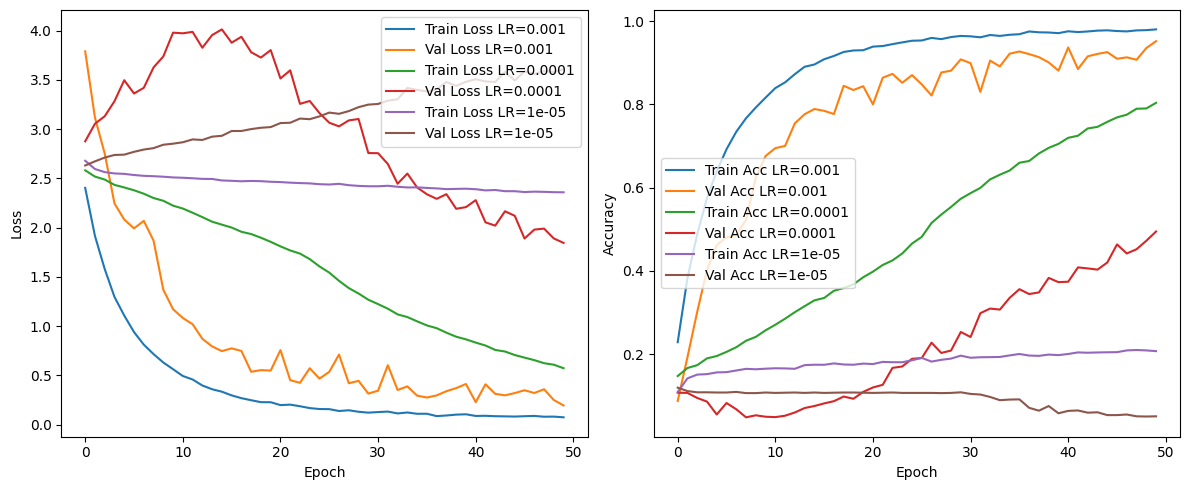

In [3]:

# Define the evaluation function
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = loss / len(data_loader)
    accuracy = correct / total
    return avg_loss, accuracy

# Define the training and evaluation function
def train_and_evaluate_model(model, train_loader, val_loader, test_loader, criterion, num_epochs, lr, device):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        avg_train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Define the learning rates to evaluate
learning_rates = [1e-3, 1e-4, 1e-5]

# Initialize the model and criterion
model = CustomMobileNet(num_classes=15).to(device)
criterion = nn.CrossEntropyLoss()

# Loop through learning rates
results = {}
for lr in learning_rates:
    print(f'\nTraining with learning rate: {lr}')
    model = CustomMobileNet(num_classes=15).to(device)
    train_losses, val_losses, train_accuracies, val_accuracies = train_and_evaluate_model(model, train_loader, val_loader, test_loader, criterion, num_epochs=50, lr=lr, device=device)
    results[lr] = (train_losses, val_losses, train_accuracies, val_accuracies)

# Plot the results
plt.figure(figsize=(12, 5))

for lr, (train_losses, val_losses, train_accuracies, val_accuracies) in results.items():
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label=f'Train Loss LR={lr}')
    plt.plot(val_losses, label=f'Val Loss LR={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label=f'Train Acc LR={lr}')
    plt.plot(val_accuracies, label=f'Val Acc LR={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()
